In [1]:
# imports
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import Image, display
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,8)

# Fundamentos de estadística descriptiva

### Ciencia de Datos para físicos: teoría y aplicaciones.

En este notebook se presentan las distribuciones de probabilidad más comunes en la estadística descriptiva. Se presentan ejemplos de su uso en el análisis de datos.

#### Variables aleatorias

Una variable aleatoria es una variable matemática que toma diferentes valores con diferentes probabilidades. Es una medida estadística utilizada para describir cualquier proceso que tiene resultados inciertos.

Hay dos tipos de variables aleatorias: discretas y continuas. Una variable aleatoria discreta solo puede tomar valores finitos o contables, mientras que una variable aleatoria continua puede tomar cualquier valor en un rango específico. Por ejemplo, el número de personas en una sala es una variable aleatoria discreta, mientras que la altura de una persona es una variable aleatoria continua.

La variable aleatoria tiene una función de distribución de probabilidad asociada a ella, que describe la probabilidad de que la variable tome cada uno de sus valores posibles. Esta función de distribución de probabilidad es la base para el cálculo de probabilidades y para la estimación de parámetros estadísticos.


### Distribuciones de probabilidad discretas

#### Distribución binomial

Describe el número de éxitos en un número fijo de ensayos independientes, cada uno con una probabilidad fija de éxito. Se caracteriza por dos parámetros: $n$, el número de ensayos, y $p$, la probabilidad de éxito en un solo ensayo.

La función de probabilidad de la distribución binomial se puede calcular utilizando la fórmula:
$$P[X = k] = \binom{n}{k} p^{k}(1-p)^{n-k}$$

Esta distribución realiza los siguientes supuestos: **Cada ensayo es independiente**, **Cada ensayo tiene dos resultados posibles**, **La probabilidad de éxito siempre es la misma en cada ensayo**.

La media de la distribución binomial es $np$ y su varianza es $np(1-p)$.

La distribución binomial tiene una variedad de aplicaciones en ciencia de datos, entre ellas:
* Modelar el número de errores en un proceso de producción
* Modelar el número de clientes que compran un producto en un día específico
* Modelar el número de defectos en un producto

Es importante saber que cuando el número de ensayos es grande y la probabilidad de éxito es pequeña, la distribución binomial se aproxima a la distribución normal, lo que permite usar herramientas estadísticas que requieren distribuciones normales.

In [2]:
""" Ejemplo 1: Si sabemos que un vendedor de tarjetas de crédito tiene un 30% de vender
¿Cuál es la probabilidad de que venda exactamente 3 de 5 tarjetas?
"""

intentos, probabilidad_venta = 5, 0.3
# Obtengamos la distribución binomial
binomial = stats.binom(n = intentos, p = probabilidad_venta)

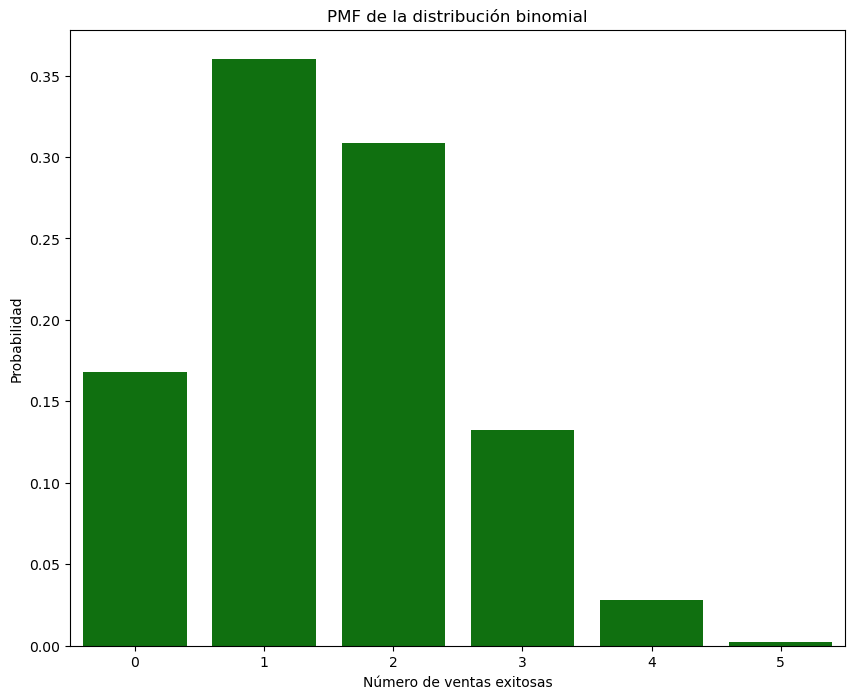

In [3]:
intentos_discretos = np.arange(0, intentos + 1)
mass_function = binomial.pmf(intentos_discretos)
# Grafiquemos la PMF probability mass function (así se llama la PDF para variables discretas)
_ = sns.barplot(x = intentos_discretos,y = mass_function, color='green')
_ = plt.ylabel('Probabilidad')
_ = plt.xlabel('Número de ventas exitosas')
_ = plt.title('PMF de la distribución binomial')

Al ver la gráfica, podemos ver que la probabilidad de vender 3 tarjetas en 5 intentos es de 0.1323, es decir, el 13.23% de las veces se venderán 3 tarjetas en 5 intentos.

In [4]:
# ¿Cuál es la probabilidad de que venda 3 tarjetas o menos?
# P(X <= 5), Para esto usamos la función de distribución acumulada
probabilidad_venta_3_tarjetas = binomial.cdf(3)
print(probabilidad_venta_3_tarjetas*100)

# o bien
print((mass_function[:4].sum())*100)

96.922
96.92199999999995


In [5]:
#¿Cuál es la probabilidad de que venda 3 tarjetas o más?
print((1 - probabilidad_venta_3_tarjetas)*100)

# o bien
print(binomial.sf(3)*100)

3.078000000000003
3.0779999999999994


#### Distribución geométrica

Describe el número de intentos necesarios para obtener un éxito en un experimento de Bernoulli. Se caracteriza por un parámetro $p$, la probabilidad de éxito en un solo ensayo.

La función de probabilidad de la distribución geométrica se puede calcular utilizando la fórmula:
$$P[X = k] = (1-p)^{k-1}p$$

Esta distribución realiza los siguientes supuestos: **Cada ensayo es independiente**, **La probabilidad de éxito siempre es la misma en cada ensayo**, **Los intentos pueden ser muy grandes**.

La media de la distribución geométrica es $\frac{1}{p}$ y su varianza es $\frac{1-p}{p^2}$.

La distribución geométrica tiene una variedad de aplicaciones en la ciencia de datos, entre ellas:
* Modelar el tiempo entre eventos: Como el tiempo entre fallas en un equipo o el tiempo entre llamadas telefónicas exitosas.
* Modelado de procesos de inventario: Modelar el tiempo entre pedidos en un proceso de inventario, lo que permite a los gerentes de inventario tomar decisiones informadas sobre cuándo realizar pedidos y cuánto pedir.
* Análisis de datos de marketing: La distribución geométrica se utiliza en el análisis de datos de marketing para modelar el número de contactos necesarios para obtener una respuesta positiva en una campaña de marketing, o el número de visitas necesarias a un sitio web antes de una compra.

In [6]:
""" Ejemplo 2: Supongamos que vendemos un producto y que lo promocionamos en internet.
Sabemos que el 10% de las personas que ven la publicidad compran el producto.
"""

probabilidad_venta = 0.1
# Obtengamos la distribución geométrica
geometrica = stats.geom(probabilidad_venta)

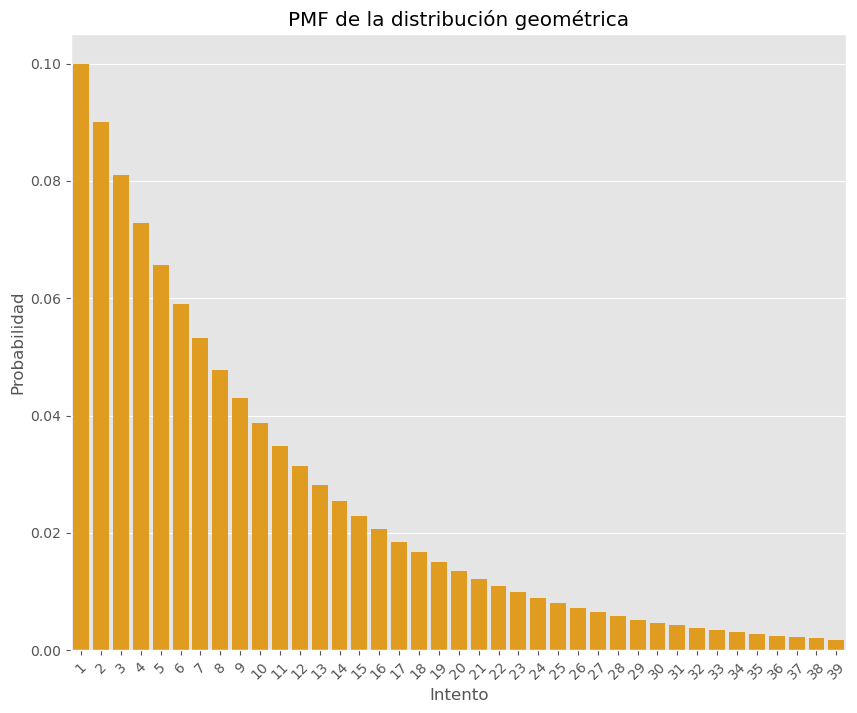

In [7]:
intentos_discretos = np.arange(1, 40)
mass_function = geometrica.pmf(intentos_discretos)
# Grafiquemos la PMF probability mass function (así se llama la PDF para variables discretas)
with plt.style.context('ggplot'):
    _ = sns.barplot(x = intentos_discretos,y = mass_function, color='orange')
    _ = plt.ylabel('Probabilidad')
    _ = plt.xlabel('Intento')
    _ = plt.title('PMF de la distribución geométrica')
    _ = plt.xticks(rotation = 45)

In [8]:
# ¿Cuál es la probabilidad de que se compre 1 producto exactamente en el 9no intento?
print(geometrica.pmf(9)*100)

4.304672100000001


In [9]:
# ¿Cuál es la probabilidad de que se compre 1 producto por cada 5 personas que ven la publicidad?
print(geometrica.cdf(5)*100)

40.95100000000001


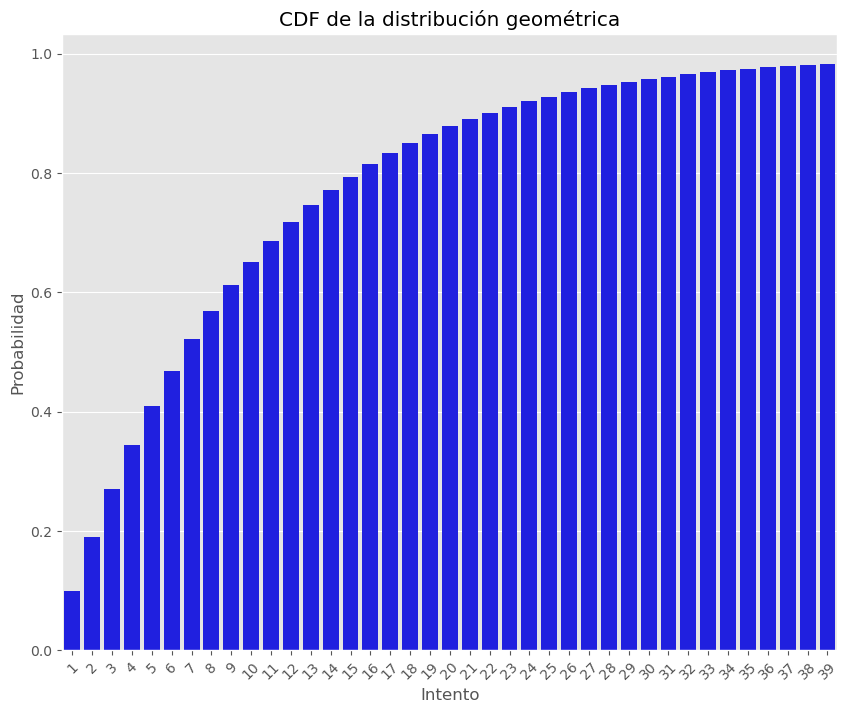

In [10]:
cdf = geometrica.cdf(intentos_discretos)

with plt.style.context('ggplot'):
    _ = sns.barplot(x = intentos_discretos,y = cdf, color='blue')
    _ = plt.ylabel('Probabilidad')
    _ = plt.xlabel('Intento')
    _ = plt.title('CDF de la distribución geométrica')
    _ = plt.xticks(rotation = 45)

#### Distribución binomial negativa

Describe el número de fracasos en un número fijo de ensayos independientes, cada uno con una probabilidad fija de éxito. Se caracteriza por dos parámetros: $n$, el número de ensayos, y $p$, la probabilidad de éxito en un solo ensayo. Es similar a la distribución binomial, pero en lugar de contar el número de éxitos, cuenta el número de fracasos. También es un caso general de la distribución geométrica.

La función de probabilidad de la distribución binomial se puede calcular utilizando la fórmula:
$$P[X = k] = \binom{k+r-1}{k} p^{r}(1-p)^{k}$$

Donde $r$ es el número de éxitos requeridos.

Esta distribución realiza los mismos supuestos que la distribución binomial.

La media de la distribución binomial negativa es $\frac{r(1-p)}{p}$ y su varianza es $\frac{r(1-p)}{p^2}$.

In [11]:
""" Ejemplo 3: Supongamos que hay un 10% de probabilidades de que un vendedor consiga programar una 
reunión de seguimiento con el cliente potencial en una llamada telefónica.
El número de llamadas que necesitaría el vendedor para conseguir 3 reuniones de seguimiento
 seguiría la distribución binomial negativa.

¿Cuál es la probabilidad de que el vendedor consiga 3 llamadas de seguimiento en la 10ma llamada?
"""
probabilidad_venta = 0.1
exitos_necesarios = 3
intentos = np.arange(3, 40)
# Obtengamos la distribución binomial negativa
bin_neg = stats.nbinom(exitos_necesarios, probabilidad_venta)

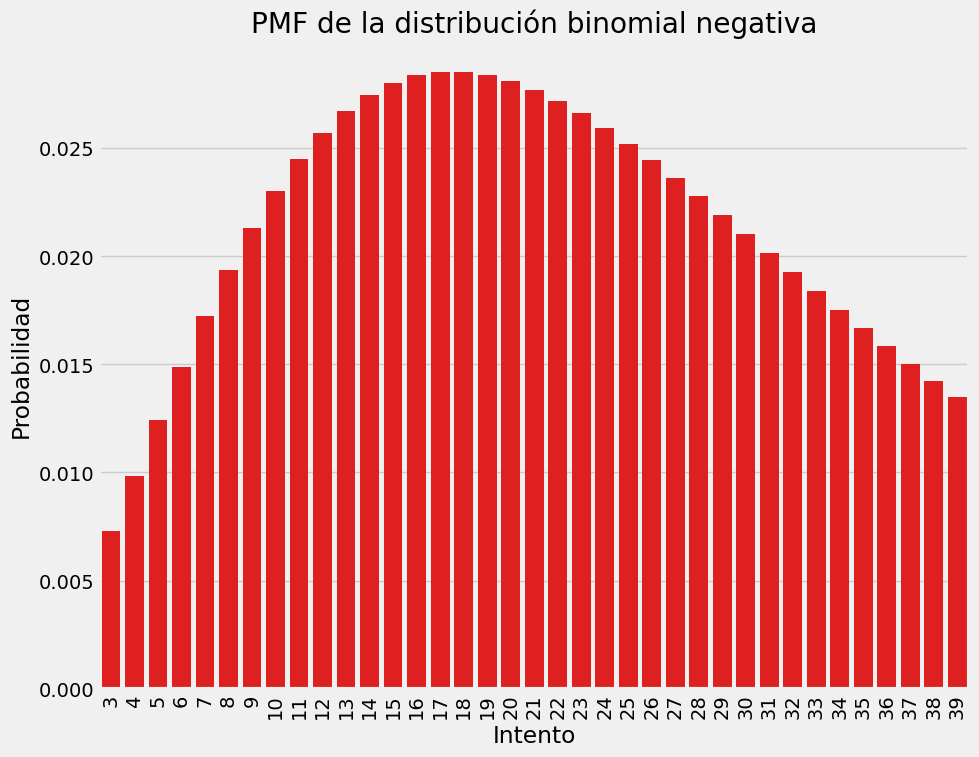

In [12]:
#Obtengamos la PMF
mass_function = bin_neg.pmf(intentos)
# Grafiquemos la PMF probability mass function (así se llama la PDF para variables discretas)
with plt.style.context('fivethirtyeight'):
    _ = sns.barplot(x = intentos,y = mass_function, color='red')
    _ = plt.ylabel('Probabilidad')
    _ = plt.xlabel('Intento')
    _ = plt.title('PMF de la distribución binomial negativa')
    _ = plt.xticks(rotation = 90)

#### Distribución Hypergeométrica

Describe el número de aciertos en un número fijo de ensayos sin reemplazo a partir de una población finita que contiene un número desconocido de aciertos.

La función de probabilidad de la distribución binomial se puede calcular utilizando la fórmula:
$$P[X = k] = \frac{\binom{K}{k}\binom{N-K}{n-k}}{\binom{N}{n}}$$

Donde $N$ es el tamaño de la población, $K$ es el número de aciertos en la población, $n$ es el número de ensayos y $k$ es el número de aciertos en los ensayos.

Esta distribución realiza los siguientes supuestos: **La población es finita y la muestra es obtenida sin reemplazo**, **La población contiene un número fijo de éxitos y fracasos**, **El tamaño de la muestra es fijo y se extrajo aleatoriamente de la población**, **La probabilidad de éxito es la misma para cada ensayo, y los ensayos son independientes.**, **El tamaño de la muestra es pequeño en comparación con el tamaño de la población, de lo contrario la distribución muestral podría no ser hipergeométrica.**.

La media de la distribución hypergeométrica es $\frac{nK}{N}$ y su varianza es $\frac{nK(N-K)(N-n)}{N^2(N-1)}$.

In [13]:
""" Ejemplo 4: Supongamos que en una fabrica de pruebas de covid, se sabe que el 10% de las pruebas
son defectuosas. Si se empacan 100 pruebas, ¿Cuál es la probabilidad de que haya exactamente
10 pruebas defectuosas?
"""

poblacion_total = 10000
exitos_pob = poblacion_total * 0.1
tamano_muestra = 100
hgeom = stats.hypergeom(M = poblacion_total, N = exitos_pob , n = tamano_muestra)

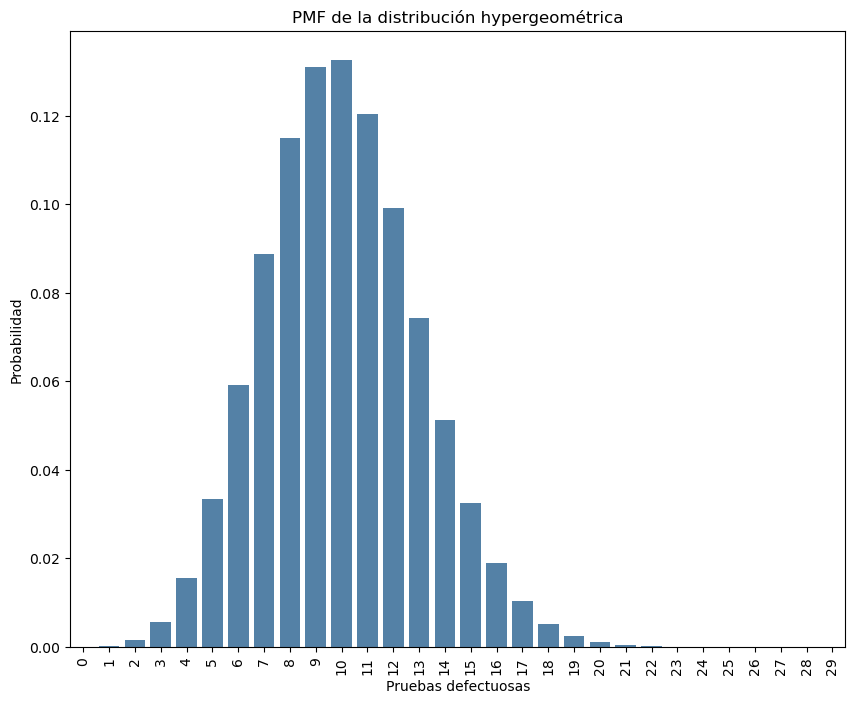

In [14]:
intentos = np.arange(0, 30)
mass_function = hgeom.pmf(intentos)
_ = sns.barplot(x = intentos,y = mass_function, color='steelblue')
_ = plt.ylabel('Probabilidad')
_ = plt.xlabel('Pruebas defectuosas')
_ = plt.title('PMF de la distribución hypergeométrica')
_ = plt.xticks(rotation = 90)

In [15]:
hgeom.pmf(10)*100

13.252954728446644

#### Distribución de Poisson
Describe el número de veces que se produce un evento en un intervalo fijo de tiempo o espacio, suponiendo que se conoce el promedio de veces que se produce el suceso en el intervalo y que el suceso se produce independientemente del tiempo transcurrido desde el último suceso.

La función de probabilidad de la distribución binomial se puede calcular utilizando la fórmula:
$$P[X = k] = \frac{\lambda^k e^{-\lambda}}{k!}$$
Donde $\lambda$ es el promedio de veces que se produce el suceso en el intervalo y $k$ es el número de veces que se produce el suceso en el intervalo.

La media y su varianza de la distribución de Poisson es $\lambda$.

Comúnmente utilizada en el control de calidad y la investigación operativa para modelar el número de ocurrencias de sucesos poco frecuentes, como el número de defectos en un artículo fabricado, el número de coches que llegan a una cabina de peaje o el número de llamadas telefónicas recibidas por un centro de llamadas.

La distribución de Poisson asume que:
* La probabilidad de que ocurra un suceso en un pequeño intervalo de tiempo o espacio es muy pequeña.
* La tasa media de sucesos es constante a lo largo del intervalo de tiempo o espacio.
* Los sucesos son independientes entre sí.
* El número de sucesos en distintos intervalos de tiempo o espacio es independiente.
* El intervalo de tiempo o espacio es fijo.

In [16]:
""" Ejemplo 5: La fonda de doña chonita recibe en promedio 6 clientes por hora. ¿Cuál es la probabilidad
de que reciba 12 clientes en una hora?
"""
eventos_totales = 6
eventos_esperados = 12
poisson = stats.poisson(mu = eventos_totales)

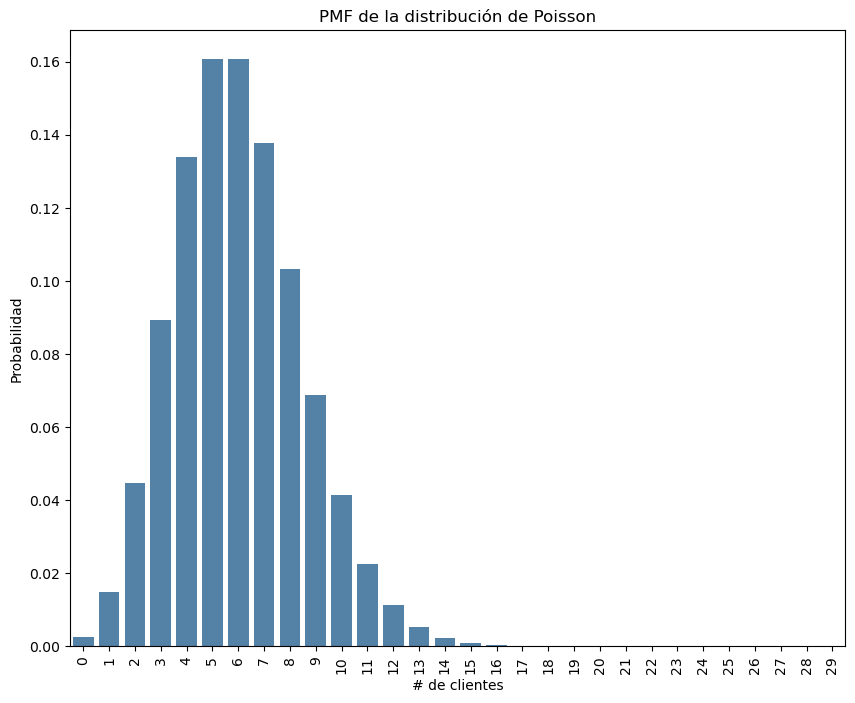

In [17]:
intentos = np.arange(0, 30)
mass_function = poisson.pmf(intentos)
_ = sns.barplot(x = intentos,y = mass_function, color='steelblue')
_ = plt.ylabel('Probabilidad')
_ = plt.xlabel('# de clientes')
_ = plt.title('PMF de la distribución de Poisson')
_ = plt.xticks(rotation = 90)

In [18]:
poisson.pmf(12)*100

1.1264480021546681

In [19]:
# ¿Cuál es la probabilidad de que reciba 12 clientes o más en una hora?
(1 - poisson.cdf(12))*100

0.8827483517898194

In [20]:
# ¿Cuál es la probabilidad de que reciba entre 4 y 12 clientes en una hora?
poisson.cdf(12)*100 - poisson.cdf(4)*100

70.61160161654706

### Distribuciones de probabilidad continuas